## Section 01 - Group 2 Filtering News-Related Posts Code

**Written**: Thursday, March 14, 2024

### **1. Uploading Data**

The Pyktok-generated csv dataset has the following columns:
- **video_id**:
- **video_timestamp**:
- **video_duration**:
- **video_locationcreated**:
- **suggested_words**:
- **video_diggcount**:
- **video_sharecount**:
- **video_commentcount**:
- **video_playcount**:
- **video_description**:
- **video_is_ad**:
- **video_stickers**:
- **author_username**:
- **author_name**:
- **author_followercount**:
- **author_followingcount**:
- **author_heartcount**:
- **author_videocount**:
- **author_diggcount**:
- **author_verified**:

In [ ]:
import os, types
import re
import csv
from google.colab import files
from pandas import Series, DataFrame
import pandas as pd
import dateutil.parser as dparser
from random import randint
from collections import Counter

In [ ]:
#gets the csv file of news accounts we wrote
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#gets the csv file of news hashtags we wrote
hashtagsList = "/content/drive/MyDrive/hashtags.csv"

### **2. Data Analysis**

In [ ]:
#saves the hashtags into a list
newsHashtags = []
with open(hashtagsList, 'r') as file:
  csv_reader = csv.reader(file)
  for row in csv_reader:
    if row:  # Check if row is not empty
      newsHashtags.append(row[0])

newsHashtags

['Hashtag name',
 'uspolitics',
 'republicans',
 'republican',
 'democrat',
 'democrats',
 'liberal',
 'politics',
 'politicaltiktok',
 '2024election',
 '2024president',
 'news',
 'breakingnews',
 'conservative',
 'immigration',
 'bordercrisis',
 'ukraine',
 'palestine',
 'gaza',
 'election',
 'trump',
 'biden',
 'covid',
 'economy',
 'breakingnews',
 'journalism',
 'worldnews',
 'economics',
 'FederalReserve',
 'leftist',
 'liberalism',
 'trump2024',
 'newstiktok',
 '2024election',
 'newsattiktok',
 'noticiastiktok',
 'noticiasen1minuto',
 'noticias',
 'newsupdate',
 'inflation',
 'chinesepolitics',
 'climatechange',
 'climategoals',
 'currentnews',
 'governmentshutdown',
 'learnontiktok',
 'trumptrial',
 'historytok',
 'trumprally',
 'nato',
 'trump',
 'crime',
 'michigan',
 'conservative',
 'rightwing',
 'vote',
 'fake news',
 'ballot',
 'israel',
 'usapolitics',
 'usaelections',
 'uselections',
 'joebiden',
 '2024debate',
 'hamas',
 'crimetok',
 'breaking',
 'climate',
 'supremecou

In [ ]:
#uploads each csv file of pyktok results
files.upload()

In [44]:
data = pd.read_csv("merged_results.csv")
posts = pd.DataFrame(data)
#removing nan values
posts = posts[posts['video_description'].notna()]
#filtering to videos in the US
posts = posts[posts['video_locationcreated'] == 'US']
posts.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
0,7315561816673750318,2023-12-22T18:16:20,18.0,US,"flipnote, flipnote animation, asdf movie, flip...",3600000.0,40100.0,11000.0,19000000.0,Bonus flipnote for you,False,NaN,zanelittlemusic,Zane Little,NaN,NaN,NaN,NaN,NaN,False
1,7331462048699649323,2024-02-03T14:37:35,8.0,US,NaN,1111.0,1.0,2.0,6589.0,☁️📙,False,NaN,createbyua,ua,NaN,NaN,NaN,NaN,NaN,False
3,7331462048699649323,2024-02-03T14:37:35,8.0,US,NaN,1111.0,1.0,2.0,6589.0,☁️📙,False,NaN,createbyua,ua,NaN,NaN,NaN,NaN,NaN,False
5,7331462048699649323,2024-02-03T14:37:35,8.0,US,NaN,1111.0,1.0,2.0,6589.0,☁️📙,False,NaN,createbyua,ua,NaN,NaN,NaN,NaN,NaN,False
7,7322969142024342826,2024-01-11T17:20:34,5.0,US,NaN,196.0,0.0,7.0,5198.0,🥴😅👍🏾 #vegan #chipotle #veggie #food,False,NaN,darlene_octavia,darleneoctavia,NaN,NaN,NaN,NaN,NaN,False


In [45]:
def getHashtags(text):
  """Takes a string phrase and returns hashtags if present"""
  if isinstance(text, str):
    return re.findall(r"#(\S+)", text.lower())
  return []

In [46]:
#extracts the hashtags for each post
posts['hashtags'] = posts['video_description'].apply(getHashtags)
#remove posts with no hashtags
posts = posts[posts['hashtags'].map(lambda x: len(x)) > 0]
posts.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,hashtags
7,7322969142024342826,2024-01-11T17:20:34,5.0,US,NaN,196.0,0.0,7.0,5198.0,🥴😅👍🏾 #vegan #chipotle #veggie #food,...,NaN,darlene_octavia,darleneoctavia,NaN,NaN,NaN,NaN,NaN,False,"[vegan, chipotle, veggie, food]"
8,7300994079754636587,2023-11-13T12:06:02,60.0,US,NaN,20700.0,16.0,33.0,139300.0,Just wait until you see his trick #interview #...,...,NaN,charxstyle,char,NaN,NaN,NaN,NaN,NaN,False,"[interview, food, bestfriend, charxstyle]"
9,7322969142024342826,2024-01-11T17:20:34,5.0,US,NaN,196.0,0.0,7.0,5198.0,🥴😅👍🏾 #vegan #chipotle #veggie #food,...,NaN,darlene_octavia,darleneoctavia,NaN,NaN,NaN,NaN,NaN,False,"[vegan, chipotle, veggie, food]"
13,7309956665221205291,2023-12-07T15:45:27,9.0,US,NaN,10300.0,59.0,91.0,413500.0,Understanding your seasonal color palette is k...,...,NaN,jacquie.lm,Jacquie,NaN,NaN,NaN,NaN,NaN,False,"[seasonalcoloranalysis, coloranalysis, styling..."
17,7326989936077458731,2024-01-22T13:23:51,5.0,US,NaN,10600.0,437.0,128.0,73100.0,"the way my entire class screamed, live laugh l...",...,NaN,happylilflower,happylilflower,NaN,NaN,NaN,NaN,NaN,False,"[badbunny, nadiesabeloquevaapasarmañana, regga..."


In [47]:
#a smaller dataframe with just the needed functions
postsSmall = posts[["video_id", "author_username", "video_description",
                "hashtags", "suggested_words"]].copy()
postsSmall.head()

,video_id,author_username,video_description,hashtags,suggested_words
7,7322969142024342826,darlene_octavia,🥴😅👍🏾 #vegan #chipotle #veggie #food,"[vegan, chipotle, veggie, food]",NaN
8,7300994079754636587,charxstyle,Just wait until you see his trick #interview #...,"[interview, food, bestfriend, charxstyle]",NaN
9,7322969142024342826,darlene_octavia,🥴😅👍🏾 #vegan #chipotle #veggie #food,"[vegan, chipotle, veggie, food]",NaN
13,7309956665221205291,jacquie.lm,Understanding your seasonal color palette is k...,"[seasonalcoloranalysis, coloranalysis, styling...",NaN
17,7326989936077458731,happylilflower,"the way my entire class screamed, live laugh l...","[badbunny, nadiesabeloquevaapasarmañana, regga...",NaN


In [38]:
#check if any posts have our hashtags
newsDF = postsSmall[postsSmall['hashtags'].apply(lambda htlst: any(hashtag in htlst for hashtag in newsHashtags)
                              if isinstance(htlst, list) else False)]
len(newsDF)


54

In [48]:
#Find percentage of news-related posts to all posts
percent_news_feed = (len(newsDF)/len(postsSmall)) *100
percent_news_feed

0.7022106631989598

In [49]:
#Now, flatten list of hashtags in news related posts - count frequency of news-related hashtags that appear in news-related posts

# Step 1: Flatten the list of hashtags from the postsSmall DataFrame
all_hashtags = [hashtag for hashtags_list in postsSmall['hashtags'] if isinstance(hashtags_list, list) for hashtag in hashtags_list]

# Step 2: Count the occurrences of each news hashtag in the flattened list
news_hashtags_frequency = Counter(hashtag for hashtag in all_hashtags if hashtag in newsHashtags)

# Display the frequency of each news hashtag
for hashtag, frequency in news_hashtags_frequency.items():
    print(f"Hashtag '{hashtag}' appears {frequency} times.")



Hashtag 'unitednations' appears 3 times.
Hashtag 'joebiden' appears 3 times.
Hashtag 'news' appears 66 times.
Hashtag 'biden' appears 15 times.
Hashtag 'michigan' appears 9 times.
Hashtag 'football' appears 14 times.
Hashtag 'newsweek' appears 1 times.
Hashtag 'politics' appears 21 times.
Hashtag 'congress' appears 2 times.
Hashtag 'sports' appears 7 times.
Hashtag 'election2024' appears 7 times.
Hashtag 'learnontiktok' appears 19 times.
Hashtag 'worldnews' appears 3 times.
Hashtag 'breakingnews' appears 14 times.
Hashtag 'police' appears 13 times.
Hashtag 'trump' appears 19 times.
Hashtag 'republican' appears 7 times.
Hashtag 'technews' appears 2 times.
Hashtag 'politicaltiktok' appears 5 times.
Hashtag 'blacklivesmatter' appears 1 times.
Hashtag 'oscars' appears 13 times.
Hashtag 'cnn' appears 8 times.
Hashtag 'leftist' appears 6 times.
Hashtag 'palestine' appears 4 times.
Hashtag 'vote' appears 3 times.
Hashtag 'election' appears 5 times.
Hashtag 'russia' appears 2 times.
Hashtag 'u

### **3. Visualizing our Data**

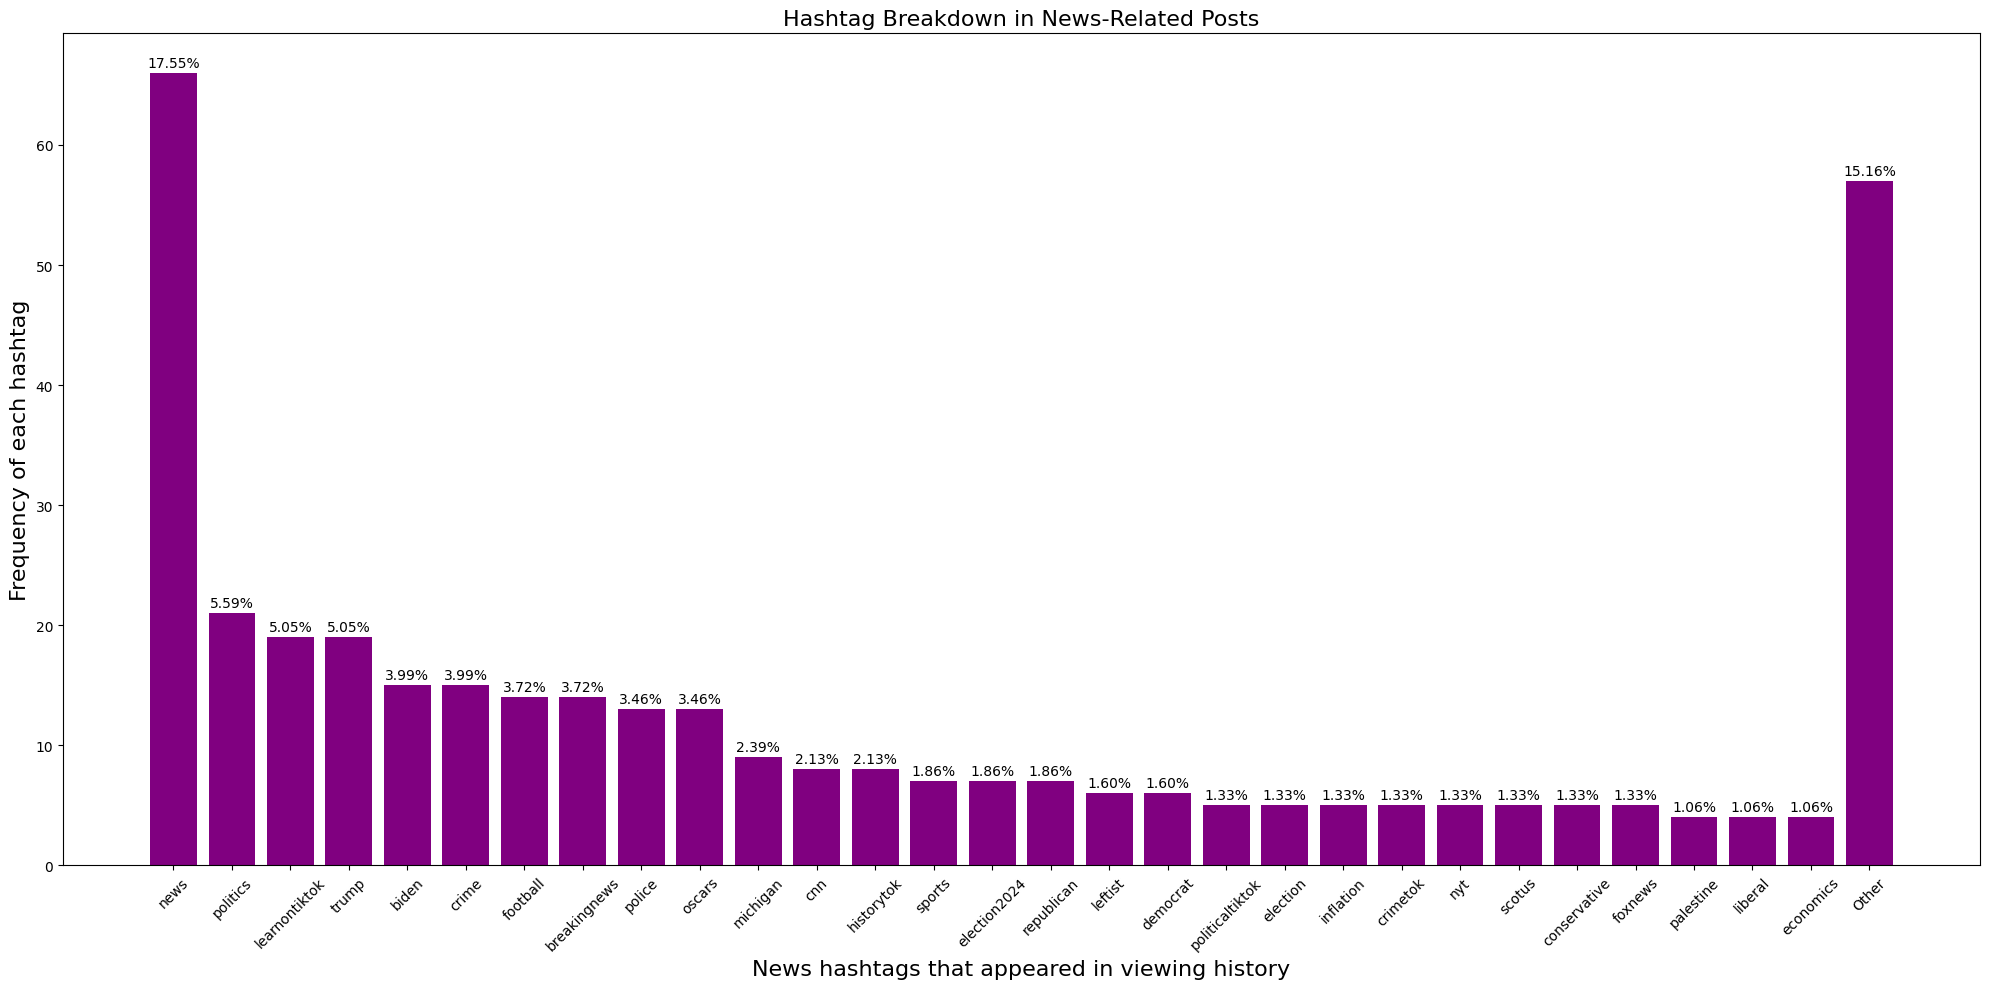

In [50]:
import matplotlib.pyplot as plt

# Select top hashtags you want to visualize
top_hashtags_to_visualize = 29  # Adjust this as needed
top_hashtags = news_hashtags_frequency.most_common(top_hashtags_to_visualize)

# Get the count of other hashtags
total_hashtags_count = sum(news_hashtags_frequency.values())
other_hashtags_count = total_hashtags_count - sum(count for _, count in top_hashtags)

# Prepare data for visualization
hashtags = [hashtag for hashtag, _ in top_hashtags]
frequencies = [count for _, count in top_hashtags] + [other_hashtags_count]
labels = hashtags + ['Other']
percentages = [(count / total_hashtags_count) * 100 for count in frequencies]

# Plot the bar chart
plt.figure(figsize=(20, 10))
plt.bar(labels, frequencies, color='purple')
plt.xlabel('News hashtags that appeared in viewing history', fontsize = 16)
plt.ylabel('Frequency of each hashtag', fontsize = 16)
plt.title('Hashtag Breakdown in News-Related Posts', fontsize = 16)
plt.xticks(rotation=45)

# Add percentages to the bars
for i, (label, frequency) in enumerate(zip(labels, frequencies)):
    plt.text(i, frequency + 0.5, f'{percentages[i]:.2f}%', ha='center')

plt.tight_layout()
plt.show()
